In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [3]:
# getting and structuring the data for the predictive model
electricity = pd.read_csv("./predict_electricity_data.csv", )
electricity.isna().sum()


Unnamed: 0        0
Date              0
ND                0
TSD               0
ENGLAND_WALES     0
GAS               0
GENERATION        0
FOSSIL            0
STORAGE           0
NUCLEAR_perc      0
SSP_Avg           0
Market Price     48
dtype: int64

In [11]:
electricity.shape

(105168, 12)

In [4]:
# drop the rows with null values
electricity.dropna(inplace=True)
electricity.isna().sum()

Unnamed: 0       0
Date             0
ND               0
TSD              0
ENGLAND_WALES    0
GAS              0
GENERATION       0
FOSSIL           0
STORAGE          0
NUCLEAR_perc     0
SSP_Avg          0
Market Price     0
dtype: int64

check the correlation between variables

In [5]:
new_electricity = electricity.drop(columns = ["Unnamed: 0"])
new_electricity

,Date,ND,TSD,ENGLAND_WALES,GAS,GENERATION,FOSSIL,STORAGE,NUCLEAR_perc,SSP_Avg,Market Price
0,2014-01-01,30008,31920,27048,2717,32027,14821,0,26.0,32.200396,35.32
1,2014-01-01,30589,32491,27625,2755,32640,15300,0,25.5,32.200396,37.28
2,2014-01-01,30306,32521,27361,2752,32679,15313,0,25.5,32.200396,41.50
3,2014-01-01,29280,31735,26447,2430,31853,14391,0,26.1,32.200396,36.74
4,2014-01-01,28174,30661,25461,2181,31004,14027,0,26.9,32.200396,32.04
...,...,...,...,...,...,...,...,...,...,...,...
105163,2019-12-31,29318,30800,26609,10384,32479,11441,0,21.5,38.246042,36.10
105164,2019-12-31,28260,29626,25618,10191,31831,11143,0,21.9,38.246042,37.90
105165,2019-12-31,27530,28817,24829,9728,30997,10594,0,22.4,38.246042,33.09
105166,2019-12-31,26765,27941,24093,9011,29548,9680,0,23.5,38.246042,23.97


In [14]:
new_electricity.corr("pearson")

C:\Users\user\AppData\Local\Temp\ipykernel_9040\2055892770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_electricity.corr("pearson")


,ND,TSD,ENGLAND_WALES,GAS,GENERATION,FOSSIL,STORAGE,NUCLEAR_perc,SSP_Avg,Market Price
ND,1.000000,0.995604,0.997423,0.678978,0.961878,0.907604,0.646475,-0.766092,0.136230,0.435718
TSD,0.995604,1.000000,0.993534,0.673906,0.960926,0.915779,0.626659,-0.758362,0.145448,0.427222
ENGLAND_WALES,0.997423,0.993534,1.000000,0.669895,0.959473,0.897330,0.641580,-0.764368,0.136462,0.432496
GAS,0.678978,0.673906,0.669895,1.000000,0.695246,0.715946,0.507960,-0.600119,0.234004,0.435933
GENERATION,0.961878,0.960926,0.959473,0.695246,1.000000,0.860549,0.618544,-0.815148,0.147003,0.412155
FOSSIL,0.907604,0.915779,0.897330,0.715946,0.860549,1.000000,0.561781,-0.687669,0.115237,0.395999
STORAGE,0.646475,0.626659,0.641580,0.507960,0.618544,0.561781,1.000000,-0.481504,0.057661,0.474669
NUCLEAR_perc,-0.766092,-0.758362,-0.764368,-0.600119,-0.815148,-0.687669,-0.481504,1.000000,-0.154366,-0.382003
SSP_Avg,0.136230,0.145448,0.136462,0.234004,0.147003,0.115237,0.057661,-0.154366,1.000000,0.514315
Market Price,0.435718,0.427222,0.432496,0.435933,0.412155,0.395999,0.474669,-0.382003,0.514315,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_9040\4245798198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_electricity.corr(), annot = True, )


<Axes: >

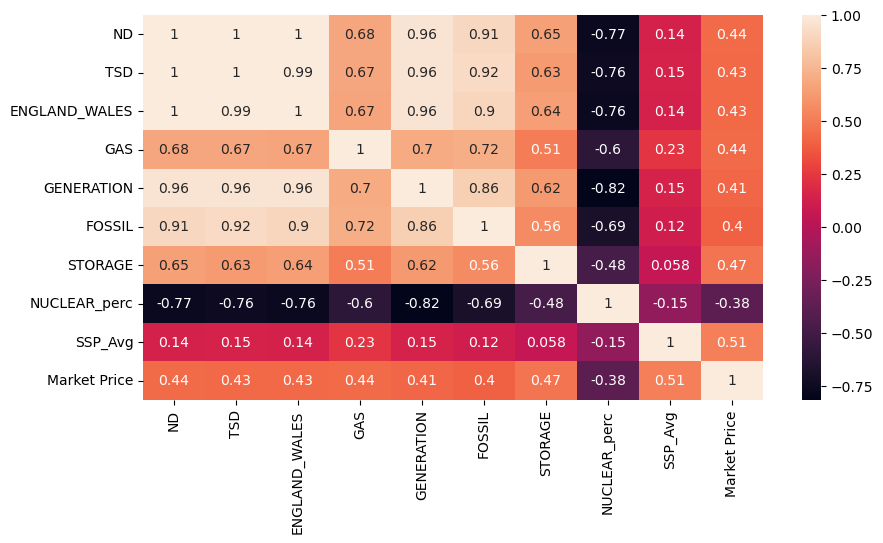

In [15]:
plt.figure(figsize = (10, 5))
sns.heatmap(new_electricity.corr(), annot = True, )

In [16]:
X = new_electricity.drop(columns = ["Market Price","Date"])
y = new_electricity["Market Price"]
scale = StandardScaler()
Scaled_X  = scale.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size = 0.2, random_state=1 )

Linear Regression

In [18]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
print(f'intercept= {model.intercept_}')
print(f'coeeficient= {model.coef_}')

intercept= 44.02751582279086
coeeficient= [13.13298371 -8.13906402 -0.15110155  1.60844258 -5.40694122  0.50023016
  5.64404806 -1.79750015  7.81441732]


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
y_pred = model.predict(X_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae_lr}')
print(f'RMSE: {rmse_lr}')

MAE: 6.471380266116292
RMSE: 10.81538921359291


In [20]:
y_test_np = np.array(y_test)

In [21]:
y_pred

array([45.90654737, 29.51093133, 45.19820031, ..., 52.38343735,
       47.8288917 , 42.80503388])

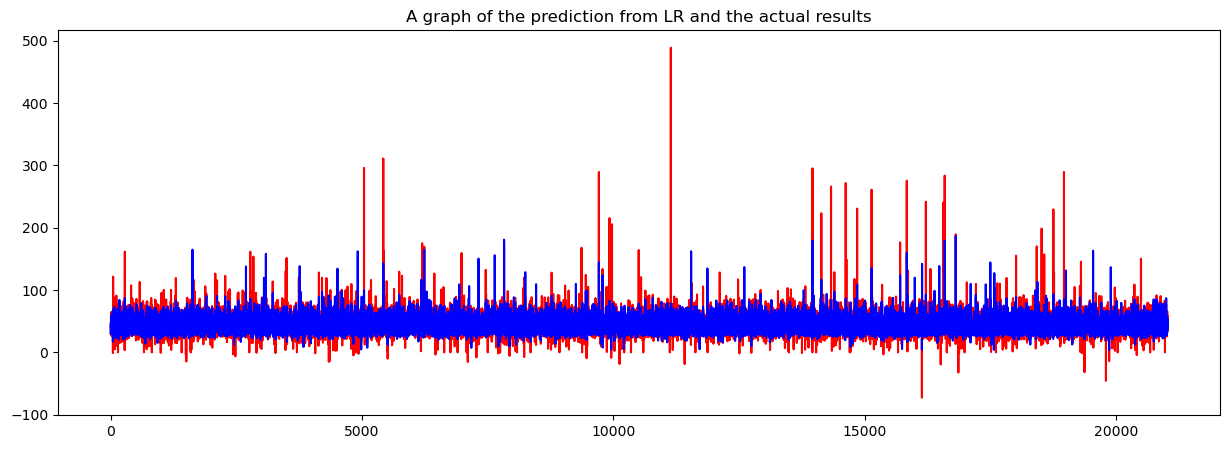

In [22]:
plt.figure(figsize=(15, 5))
x = np.arange(1, len(y_test)+1)
plt.title("A graph of the prediction from LR and the actual results")

plt.plot(x, y_test, color = "red", label = "test")
plt.plot(x, y_pred, color = "blue", label = "predictions")

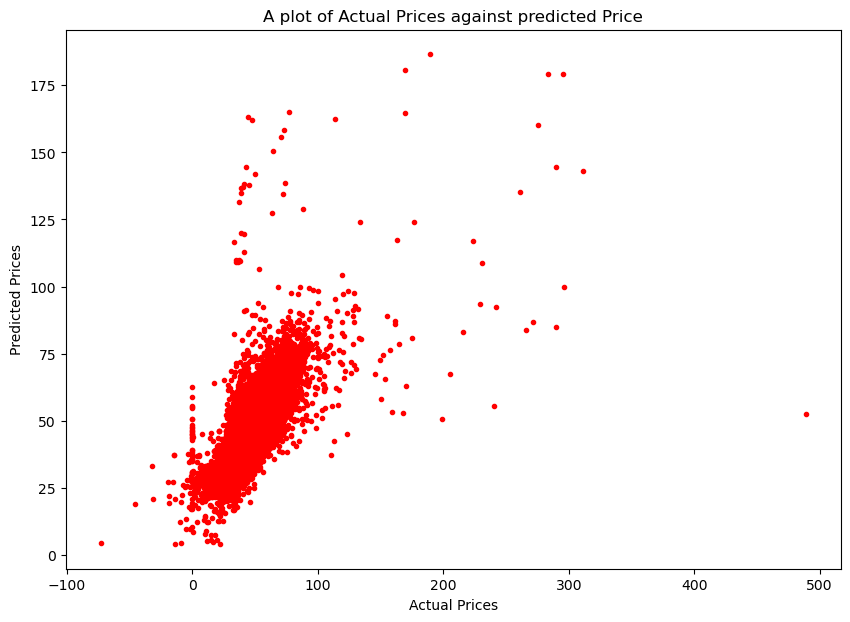

In [23]:
plt.figure(figsize=(10,7))
plt.title("A plot of Actual Prices against predicted Price")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.scatter(y_test, y_pred, c="red", marker=".")

Residuals for LR: e = y - y_pred

In [24]:
e = [(y_test_np[i] - y_pred[i]) for i in range(len(y_test))]

 Visualizing the residuals in a scatter plot against the predicted values can help identify patterns or heteroscedasticity (unequal variances) in the errors.
Residuals should have constant variance throughout the range of predicted values. If the variance of residuals changes with predicted values, it indicates heteroscedasticity.

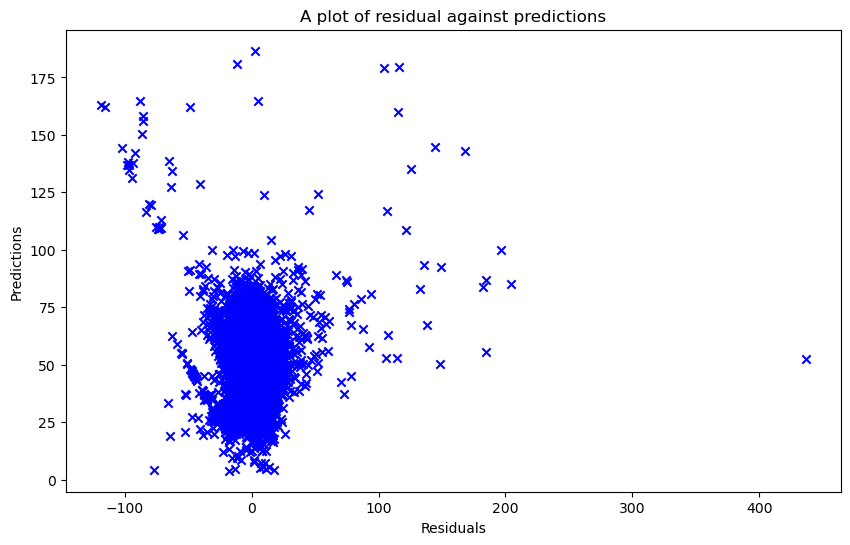

In [25]:
# Residual plot for checking heteroscedasticity
plt.figure(figsize= (10,6))
plt.title("A plot of residual against predictions")
plt.xlabel("Residuals")
plt.ylabel("Predictions")
plt.scatter(e, y_pred, marker ="x", color = "b")

Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt = DecisionTreeRegressor(random_state = 42)
model_dt = dt.fit(X_train, y_train)
y_predict = model_dt.predict(X_test)

In [28]:
y_predict

array([42.88, 27.32, 30.49, ..., 40.01, 49.27, 39.58])

In [29]:
y_test_np = np.array(y_test)
y_test_np

array([46.85, 28.89, 40.41, ..., 52.17, 44.03, 41.81])

In [30]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_predict))
mae_dt = mean_absolute_error(y_test, y_predict)
print(f'MAE: {mae_dt}')
print(f'RMSE: {rmse_dt}')

MAE: 5.653777587519026
RMSE: 11.721005185032753


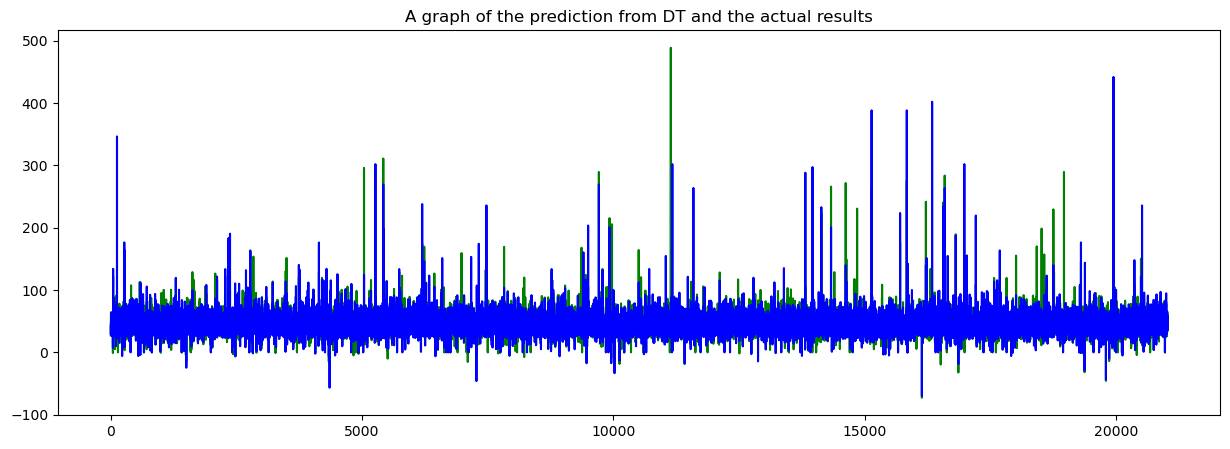

In [31]:
plt.figure(figsize=(15, 5))
x = np.arange(1, len(y_test)+1)
plt.title("A graph of the prediction from DT and the actual results")

plt.plot(x, y_test, color = "green", label = "test")
plt.plot(x, y_predict, color = "blue", label = "predictions")

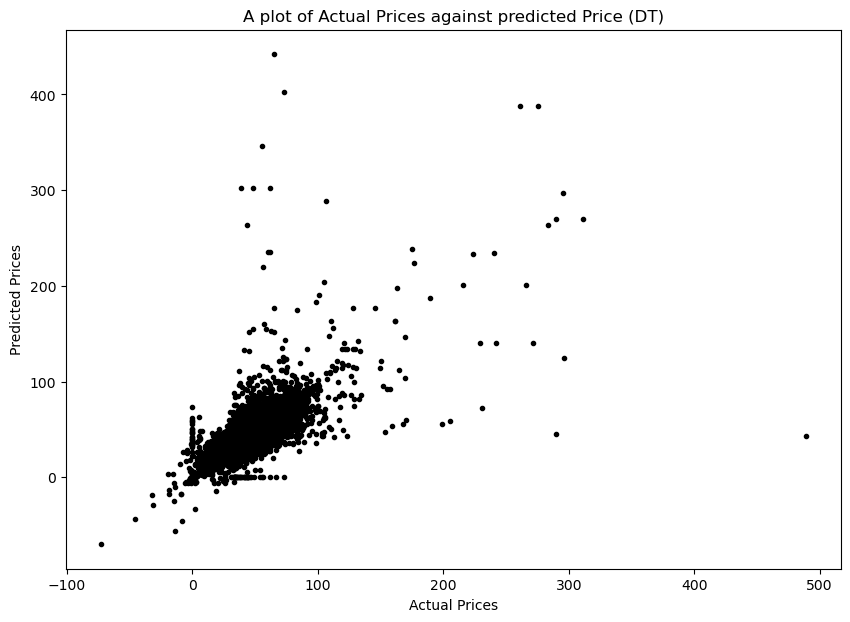

In [32]:
plt.figure(figsize=(10,7))
plt.title("A plot of Actual Prices against predicted Price (DT)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.scatter(y_test, y_predict, c="black", marker=".")

Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(random_state = 42, max_depth= 100, n_estimators= 300)
model_rf = rf.fit(X_train, y_train)

In [35]:
y_p = model_rf.predict(X_test)

Evaluation metrics using mean absolute error and mean absolute error

In [36]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_p))
mae_rf = mean_absolute_error(y_test, y_p)
print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')

MAE: 4.1254454908675795
RMSE: 7.316602629999754


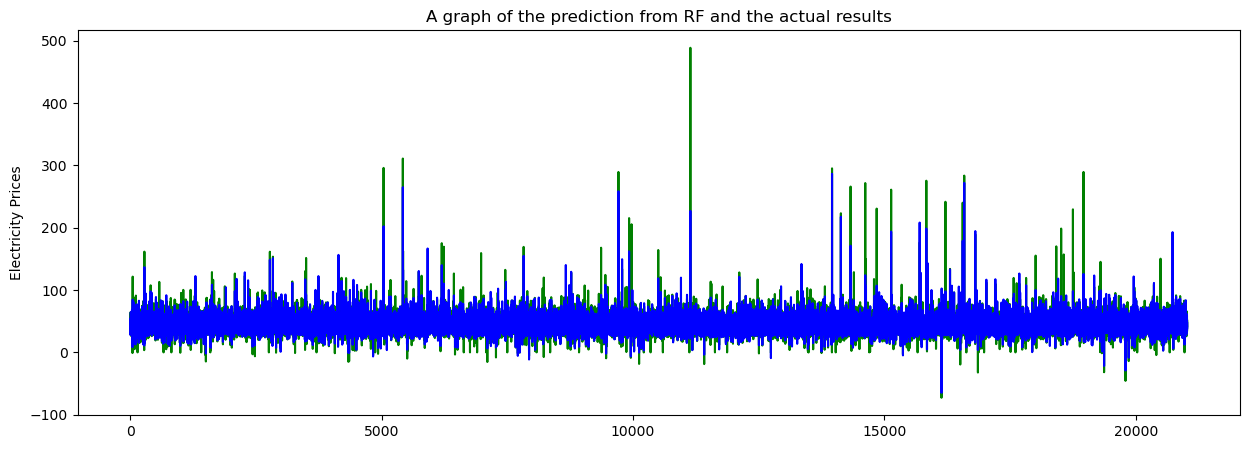

In [37]:
plt.figure(figsize=(15, 5))
x = np.arange(1, len(y_test)+1)
plt.title("A graph of the prediction from RF and the actual results")
plt.ylabel("Electricity Prices")
plt.plot(x, y_test, color = "green", label = "test")
plt.plot(x, y_p, color = "blue", label = "predictions")


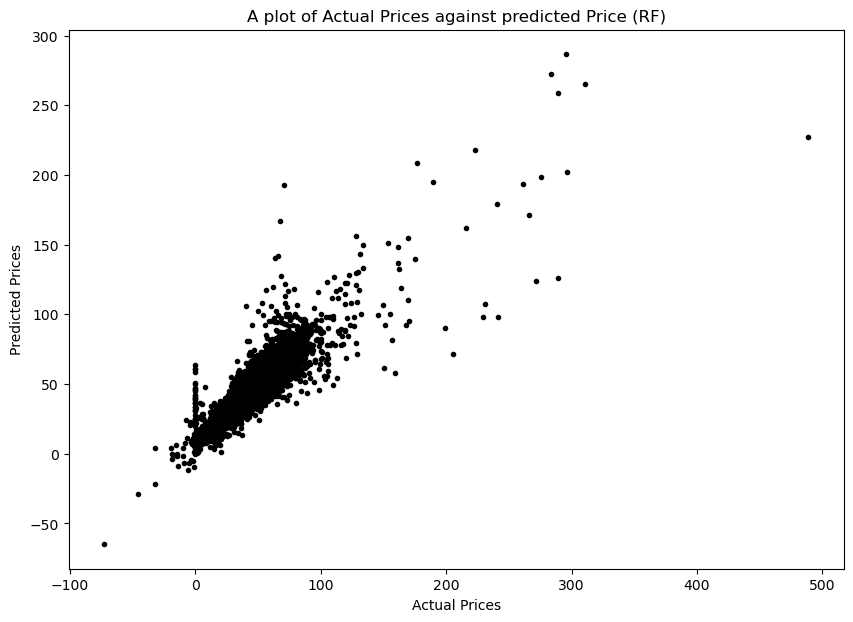

In [38]:
plt.figure(figsize=(10,7))
plt.title("A plot of Actual Prices against predicted Price (RF)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.scatter(y_test, y_p, c="black", marker=".")

ARIMA MODEL

In [39]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Figuring out the order

We want to take an order that minimize the AIC

In [40]:
stepwise = auto_arima(y, trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=122.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=681533.372, Time=2.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=678668.667, Time=2.91 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=678676.047, Time=6.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=681531.372, Time=1.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678650.176, Time=4.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=678605.453, Time=4.86 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=677834.995, Time=6.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=677193.309, Time=7.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=161.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=134.68 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=677191.309, Time=3.35 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=677832.995, Time=2.68 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=47.97 sec
 ARIMA(4,1,1)(0,0,0)[0]   

checking for stationarity

Autoregressive Models are based on stationarity, here we will use the p-value to check the stationarity.
A smaller p-value mean the data is stationary and so we can pedict for the future given the lags

In [41]:
elec = pd.read_csv("./predict_electricity_data.csv",index_col="Date")
elec = elec.drop(columns = ["Unnamed: 0"])
elec["Market Price"]

Date
2014-01-01    35.32
2014-01-01    37.28
2014-01-01    41.50
2014-01-01    36.74
2014-01-01    32.04
              ...  
2019-12-31    36.10
2019-12-31    37.90
2019-12-31    33.09
2019-12-31    23.97
2019-12-31    32.06
Name: Market Price, Length: 105168, dtype: float64

Text(0, 0.5, 'Electricity market Price')

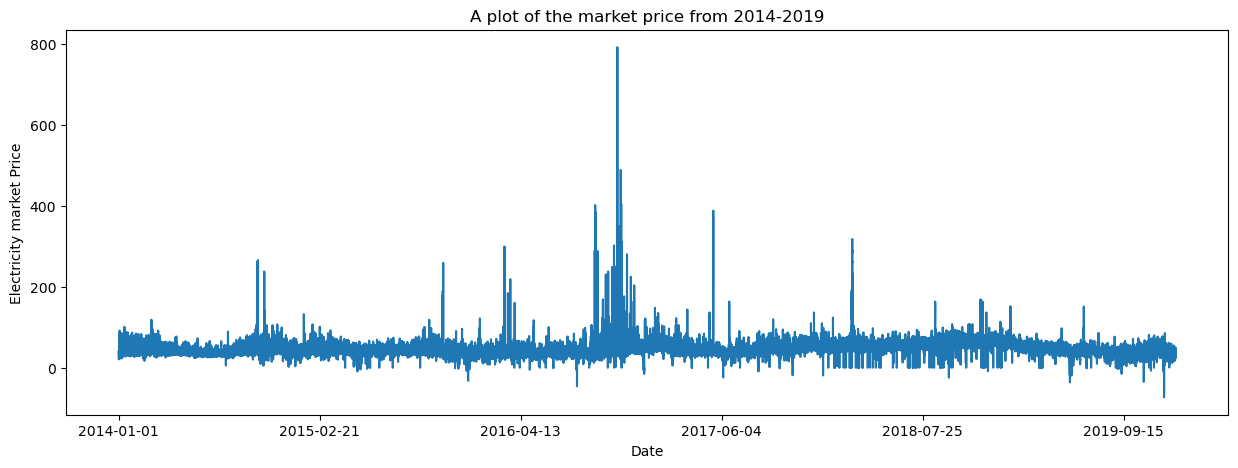

In [42]:
plt.title("A plot of the market price from 2014-2019")
elec["Market Price"].plot(figsize=(15, 5))
plt.ylabel("Electricity market Price")

In [43]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print(f"1. P-Value: {dftest[1]}")
    print(f"2. Number of lags: {dftest[2]}")
    print("Critical value: ")
    for key, val in dftest[4].items():
        print("\t", key, " ", val)
ad_test(y)

1. P-Value: 2.0394078116834747e-30
2. Number of lags: 57
Critical value: 
	 1%   -3.4304122438158373
	 5%   -2.861567510806035
	 10%   -2.566784643036841


In [44]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit the ARIMA model on the training data
order = (5,1,0)  # (p, d, q) order of ARIMA model
model = ARIMA(y_train, order=order)
fitted_model = model.fit()

# Number of steps to forecast into the future
forecast_steps = len(y_test)
start = len(X_train)
end = len(X_train) + len(X_test)-1

# Make predictions for the test data
# predictions = fitted_model.forecast(steps=forecast_steps)
predictions = fitted_model.predict( start = start, end = end, type= 'levels')

# Calculate RMSE
rmse_arima = mean_squared_error(y_test, predictions, squared=False)
mae_arima = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae_arima}")
print("Root Mean Squared Error (RMSE):", rmse_arima)


MAE: 10.215365635028009
Root Mean Squared Error (RMSE): 15.771908035374832


In [45]:
predictions
predictions_np = np.array(predictions)

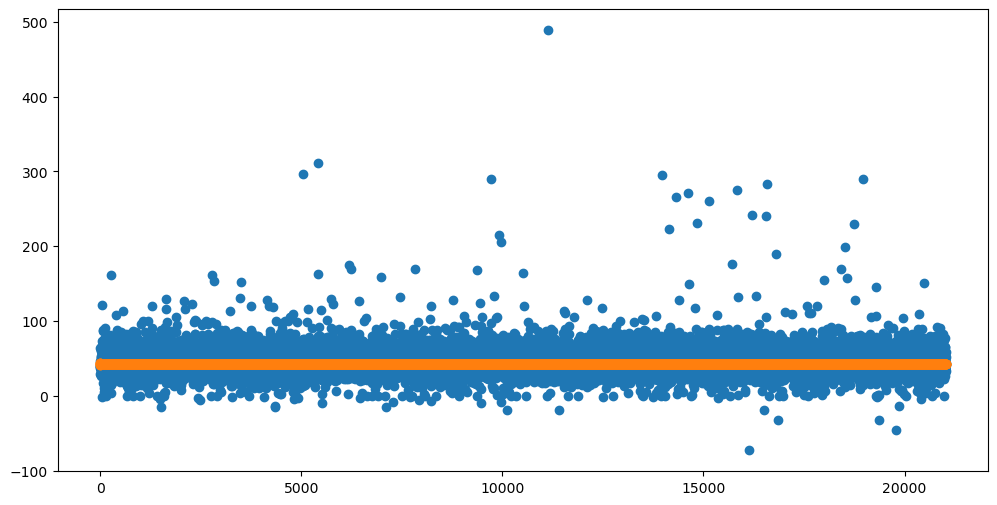

In [46]:
plt.figure(figsize= (12, 6))
x = np.arange(1, len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, predictions_np)

XGboost

In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume you have prepared your dataset with features X and target variable y

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae_sgb = mean_absolute_error(y_test, y_pred)
rmse_sgb = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
r2 = xgb_model.score(X_test, y_test)

print("MAE:", mae_sgb)
print("RMSE:", rmse_sgb)
print("R-squared:", r2)

MAE: 6.471380266116292
RMSE: 9.915095444188532
R-squared: 0.6010285586481807


SVR

In [48]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = svr_model.score(X_test, y_test)

print("MAE:", mae_svr)
print("RMSE:", rmse_svr)
print("R-squared:", r2)

MAE: 5.777155425828392
RMSE: 10.597749943225951
R-squared: 0.5441989225878237


Comparing all errors

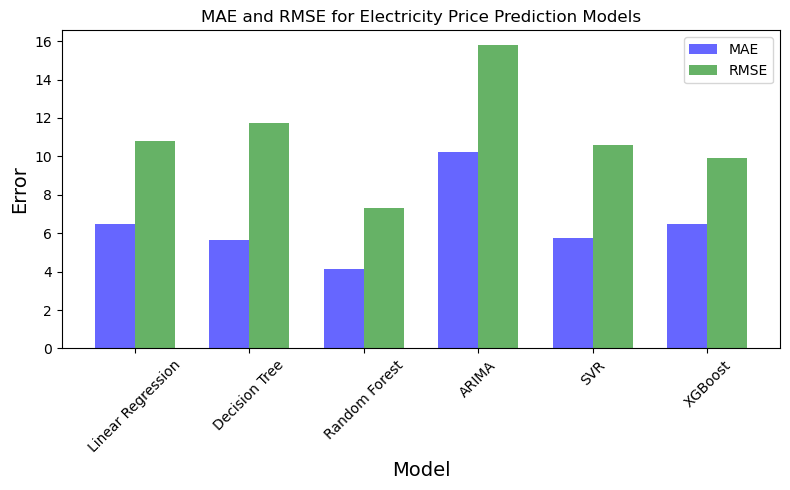

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have the MAE and RMSE values for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'ARIMA', "SVR", "XGBoost"]
mae_values = [mae_lr, mae_dt, mae_rf, mae_arima,mae_svr, mae_sgb]
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_arima, rmse_svr, rmse_sgb]

bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(index, mae_values, width=bar_width, label='MAE', color='b', alpha=0.6)
plt.bar(index + bar_width, rmse_values, width=bar_width, label='RMSE', color='g', alpha=0.6)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('MAE and RMSE for Electricity Price Prediction Models', fontsize=12)
plt.xticks(index + bar_width/2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Summary of Model errors

In [52]:
error = pd.DataFrame(columns = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'ARIMA', "SVR", "XGBoost"])
error['Linear_Regression'] = [mae_lr, rmse_lr]
error['Decision_Tree'] = [mae_dt, rmse_dt]
error['Random_Forest'] = [mae_rf, rmse_rf]
error['ARIMA'] = [mae_arima, rmse_arima]
error['SVR'] = [mae_svr, rmse_svr]
error['XGBoost'] = [mae_sgb, rmse_sgb]

error.index = ["MAE", "RMSE"]
# error.to_csv("./evaluation_metrics.csv")
error

,Linear_Regression,Decision_Tree,Random_Forest,ARIMA,SVR,XGBoost
MAE,6.471380,5.653778,4.125445,10.215366,5.777155,6.471380
RMSE,10.815389,11.721005,7.316603,15.771908,10.597750,9.915095


The best model is still random forest.... Lets check for important feature

         Feature  Importance
8        SSP_Avg    0.367797
6        STORAGE    0.229163
7   NUCLEAR_perc    0.079331
5         FOSSIL    0.076361
3            GAS    0.069686
0             ND    0.064644
4     GENERATION    0.055814
1            TSD    0.029245
2  ENGLAND_WALES    0.027958


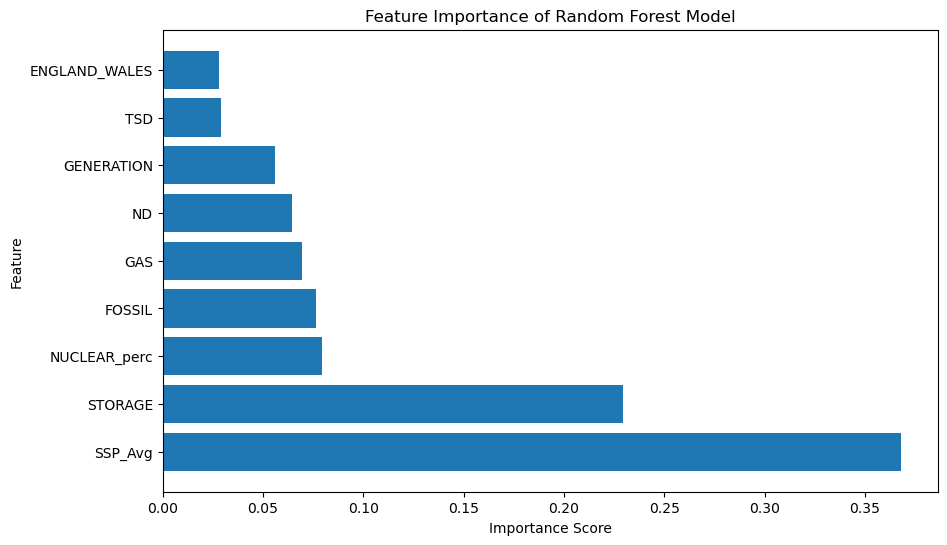

In [53]:

# Get the feature importances
feature_importance = model_rf.feature_importances_

# Create a DataFrame to show the feature importance scores along with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
print(feature_importance_df)

# Optional: Plot a horizontal bar chart to visualize feature importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()


Model(RF) without renewable 

In [6]:
new_electricity

,Date,ND,TSD,ENGLAND_WALES,GAS,GENERATION,FOSSIL,STORAGE,NUCLEAR_perc,SSP_Avg,Market Price
0,2014-01-01,30008,31920,27048,2717,32027,14821,0,26.0,32.200396,35.32
1,2014-01-01,30589,32491,27625,2755,32640,15300,0,25.5,32.200396,37.28
2,2014-01-01,30306,32521,27361,2752,32679,15313,0,25.5,32.200396,41.50
3,2014-01-01,29280,31735,26447,2430,31853,14391,0,26.1,32.200396,36.74
4,2014-01-01,28174,30661,25461,2181,31004,14027,0,26.9,32.200396,32.04
...,...,...,...,...,...,...,...,...,...,...,...
105163,2019-12-31,29318,30800,26609,10384,32479,11441,0,21.5,38.246042,36.10
105164,2019-12-31,28260,29626,25618,10191,31831,11143,0,21.9,38.246042,37.90
105165,2019-12-31,27530,28817,24829,9728,30997,10594,0,22.4,38.246042,33.09
105166,2019-12-31,26765,27941,24093,9011,29548,9680,0,23.5,38.246042,23.97


In [13]:
X = new_electricity[["ND", "TSD", "SSP_Avg"]]
y = new_electricity["Market Price"]
scale = StandardScaler()
Scaled_X  = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size = 0.2, random_state=1 )

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42, max_depth= 100, n_estimators= 300)
model_rf = rf.fit(X_train, y_train)
y_p = model_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_p))
mae_rf = mean_absolute_error(y_test, y_p)
print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')

MAE: 5.043065579088751
RMSE: 7.993690542658194


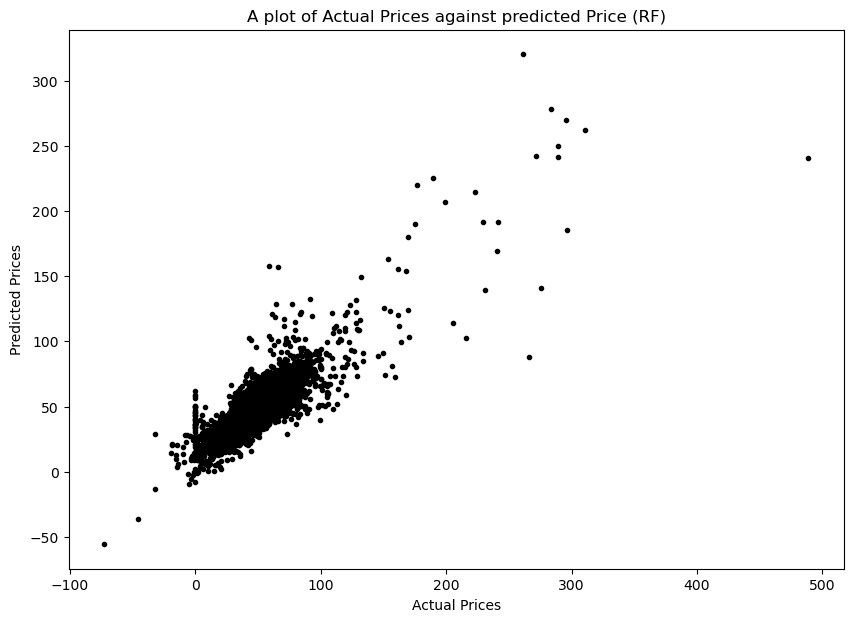

In [18]:
plt.figure(figsize=(10,7))
plt.title("A plot of Actual Prices against predicted Price (RF)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.scatter(y_test, y_p, c="black", marker=".")

is that the case for taking the demand feature out

In [21]:
X = new_electricity.drop(columns= ["ND","Date", "Market Price", "TSD"])
y = new_electricity["Market Price"]
scale = StandardScaler()
Scaled_X  = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size = 0.2, random_state=1 )

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42, max_depth= 100, n_estimators= 300)
model_rf = rf.fit(X_train, y_train)
y_p = model_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_p))
mae_rf = mean_absolute_error(y_test, y_p)
print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')

MAE: 4.121526163749366
RMSE: 7.377477924197467


It is obvious that the model still have a good performance in the absence of the demand variables

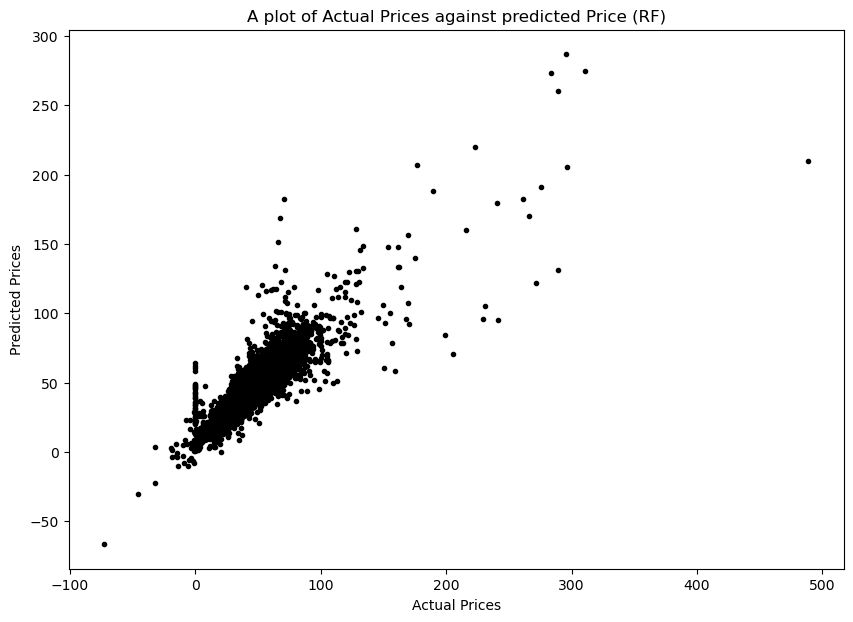

In [23]:
plt.figure(figsize=(10,7))
plt.title("A plot of Actual Prices against predicted Price (RF)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.scatter(y_test, y_p, c="black", marker=".")